In [1]:
import pandas as pd
from pycaret.classification import *
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import average_precision_score
from utils import *

In [7]:
df_train, df_test = get_raw_data()
clf1 = setup(data = df_train, 
             target = 'target',
             silent=True,
             log_experiment = True,
             use_gpu=True,
             experiment_name = 'selected_model',
             fix_imbalance = True, 
             transformation = True, 
             polynomial_features = True,
            )
add_metric('apc', 'APC', average_precision_score, target = 'pred_proba')
best = compare_models(sort="APC", 
                      include=["lightgbm", "et", "rf", "lr", "gbc"],
                     probability_threshold=0.5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,APC,TT (Sec)
et,Extra Trees Classifier,0.9802,0.9851,0.8799,0.9767,0.9243,0.9130,0.9156,0.9592,0.3620
rf,Random Forest Classifier,0.9764,0.9839,0.8751,0.9522,0.9108,0.8972,0.8990,0.9579,0.2390
lightgbm,Light Gradient Boosting Machine,0.9783,0.9827,0.8937,0.9485,0.9191,0.9066,0.9079,0.9563,0.5450
gbc,Gradient Boosting Classifier,0.9751,0.9794,0.9032,0.9181,0.9099,0.8955,0.8960,0.9550,1.8910
lr,Logistic Regression,0.9585,0.9753,0.9028,0.8236,0.8592,0.8351,0.8377,0.9442,0.0360


In [8]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

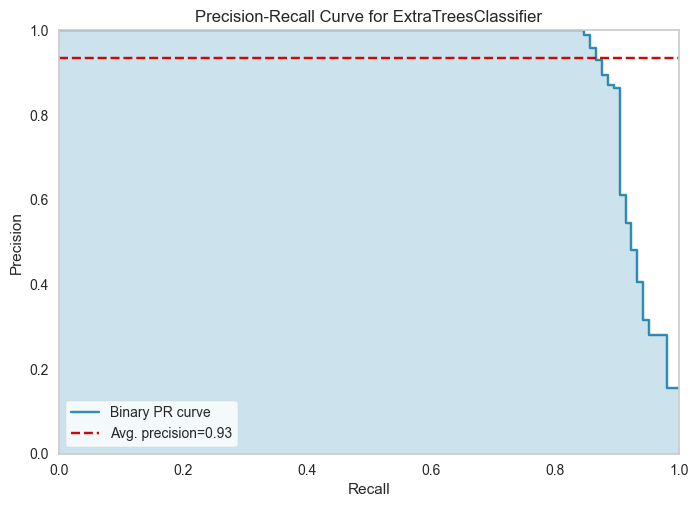

In [9]:
plot_model(best, plot = 'pr')

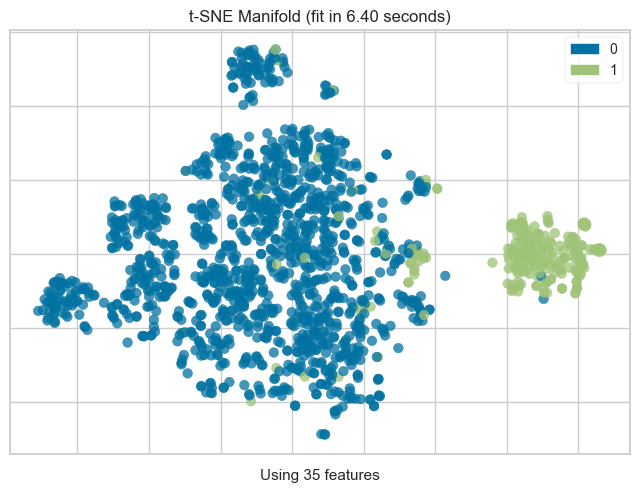

In [5]:
plot_model(best, plot = 'manifold')

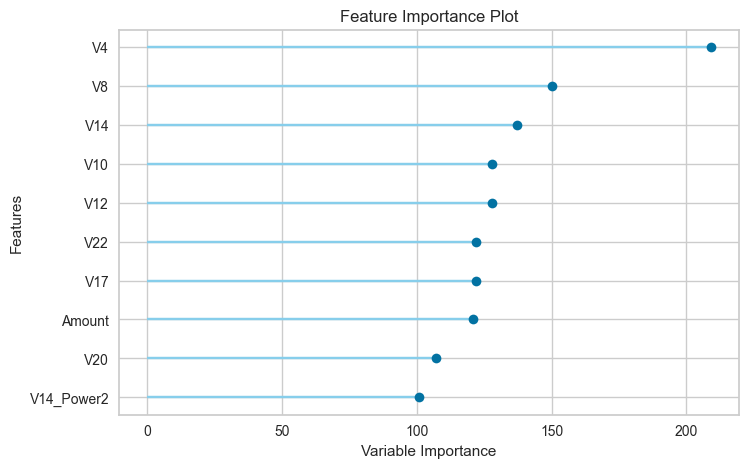

In [6]:
plot_model(best, plot="feature")